In [1]:
# Imported libraries
import gym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import random

In [2]:
# Setting seed for comparison with report
random.seed(7)

In [3]:
# Creating and setting the environment
env = gym.make("MountainCar-v0")

In [4]:
#Setting the discretization for the state-space
state_space = np.array([env.observation_space.high - env.observation_space.low])
pos_num = int(state_space[0,0]*10) + 1
vel_num = int(state_space[0,1]*100) + 1

In [5]:
# Function for q_learning algorithm
def q_learning(env, episodes, discount_factor, learning_rate, show_last_anim = True):
    
    q_values = np.zeros(shape = (pos_num, vel_num, env.action_space.n))
  
    for i in range(pos_num):
        for j in range(vel_num):
            for k in range(env.action_space.n):
                #Initialization of Q-values
                q_values[i,j,k] = random.uniform(-0.5, 0.5)    

    for i in range(episodes):
        exact_s = env.reset()
        state = np.round((exact_s- env.observation_space.low)*np.array([10, 100])).astype(int)
        done = False
        timestep = 0
        while(done != True):            
            if episodes- i < 3:
                if show_last_anim:
                    env.render()  
            action = np.argmax(q_values[state[0], state[1],:])
            #Learning next state and reward that corresponds to the action taken 
            next_exact_s, r, done, info = env.step(action)
            next_state = np.round((next_exact_s- env.observation_space.low)*np.array([10, 100])).astype(int)
            #Updating Q-value
            q_values[state[0], state[1], action] = q_values[state[0], state[1], action] + learning_rate*(r + discount_factor*np.max(q_values[next_state[0], next_state[1],:]) - q_values[state[0], state[1], action]) 
            state = next_state
            timestep += 1
        #List that contains the total timesteps taken per episode
        t.append(timestep)
        if (i % 100 == 0): print("Episode %d finished after %d timesteps." % (i,timestep))
    env.close()
    return q_values,t

## Experiments for selection of hyperparameters

Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 200 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 200 timesteps.
Episode 900 finished after 200 timesteps.
Episode 1000 finished after 200 timesteps.
Episode 1100 finished after 200 timesteps.
Episode 1200 finished after 200 timesteps.
Episode 1300 finished after 200 timesteps.
Episode 1400 finished after 200 timesteps.
Episode 1500 finished after 200 timesteps.
Episode 1600 finished after 200 timesteps.
Episode 1700 finished after 200 timesteps.
Episode 1800 finished after 200 timesteps.
Episode 1900 finished after 200 timesteps.
Episode 2000 finished after 200 timesteps.
Episode 2100 finished after 200 timesteps.
Episode 2200 finished after 200 timesteps.
Episode 2300 finished a

Episode 1800 finished after 200 timesteps.
Episode 1900 finished after 200 timesteps.
Episode 2000 finished after 145 timesteps.
Episode 2100 finished after 200 timesteps.
Episode 2200 finished after 150 timesteps.
Episode 2300 finished after 200 timesteps.
Episode 2400 finished after 151 timesteps.
Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 143 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 162 timesteps.
Episode 900 finished after 200 timesteps.
Episode 1000 finished after 200 timesteps.
Episode 1100 finished after 200 timesteps.
Episode 1200 finished after 194 timesteps.
Episode 1300 finished after 200 timesteps.
Episode 1400 finished after 200 timesteps.
Episode 1500 finished after 200 timesteps.
Episode 1600 finished a

Text(0, 0.5, 'Average Number of Steps to Complete')

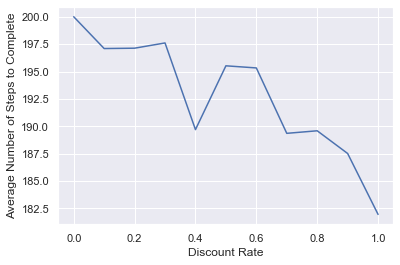

In [6]:
# Experimenting with the hyperparameters
# Trying different discount rates
steps_mean = []
for i in np.linspace(0,1,11):
    t = []
    q_array,t= q_learning(env, 2500, i, 0.25, False)
    steps_mean.append(np.mean(t))
    
plt.plot(np.linspace(0,1,11), steps_mean)
plt.xlabel("Discount Rate")
plt.ylabel("Average Number of Steps to Complete")

Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 200 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 200 timesteps.
Episode 900 finished after 200 timesteps.
Episode 1000 finished after 200 timesteps.
Episode 1100 finished after 200 timesteps.
Episode 1200 finished after 200 timesteps.
Episode 1300 finished after 200 timesteps.
Episode 1400 finished after 200 timesteps.
Episode 1500 finished after 200 timesteps.
Episode 1600 finished after 200 timesteps.
Episode 1700 finished after 200 timesteps.
Episode 1800 finished after 200 timesteps.
Episode 1900 finished after 200 timesteps.
Episode 2000 finished after 200 timesteps.
Episode 2100 finished after 200 timesteps.
Episode 2200 finished after 200 timesteps.
Episode 2300 finished a

Episode 1800 finished after 148 timesteps.
Episode 1900 finished after 116 timesteps.
Episode 2000 finished after 114 timesteps.
Episode 2100 finished after 200 timesteps.
Episode 2200 finished after 114 timesteps.
Episode 2300 finished after 185 timesteps.
Episode 2400 finished after 200 timesteps.
Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 161 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 143 timesteps.
Episode 900 finished after 200 timesteps.
Episode 1000 finished after 149 timesteps.
Episode 1100 finished after 172 timesteps.
Episode 1200 finished after 146 timesteps.
Episode 1300 finished after 155 timesteps.
Episode 1400 finished after 200 timesteps.
Episode 1500 finished after 200 timesteps.
Episode 1600 finished a

Text(0, 0.5, 'Average Number of Steps to Complete')

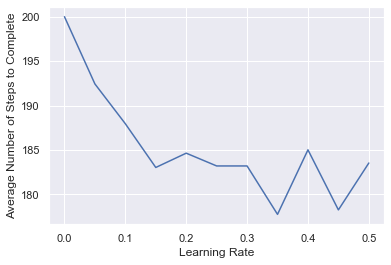

In [7]:
# Trying different learning rates
steps_mean = []
for i in np.linspace(0,0.5,11):
    t = []
    q_array,t= q_learning(env, 2500, 0.99, i, False)
    steps_mean.append(np.mean(t))
    
plt.plot(np.linspace(0,0.5,11), steps_mean)
plt.xlabel("Learning Rate")
plt.ylabel("Average Number of Steps to Complete")

In [8]:
# Experimenting with different number of episodes
steps_mean = []
for i in [500, 5000, 10000]:
    t = []
    q_array,t= q_learning(env, i, 0.99, 0.35, False)
    state_values = np.zeros(shape = (pos_num, vel_num))
    steps_mean.append(np.mean(t)) 

Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 194 timesteps.
Episode 300 finished after 162 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 200 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 200 timesteps.
Episode 900 finished after 162 timesteps.
Episode 1000 finished after 200 timesteps.
Episode 1100 finished after 200 timesteps.
Episode 1200 finished after 162 timesteps.
Episode 1300 finished after 200 timesteps.
Episode 1400 finished after 154 timesteps.
Episode 1500 finished after 147 timesteps.
Episode 1600 finished after 200 timesteps.
Episode 1700 finished after 200 timesteps.
Episode 1800 finished after 15

In [9]:
# Average steps for different number of episode (500, 5000, 10000)
steps_mean

[197.696, 181.8172, 160.7742]

## Final Model and Heat Map

In [10]:
# Running the q-learning algorithm with necessary parameters
t = []
q_array,t= q_learning(env, 10000, 0.99, 0.35)
state_values = np.zeros(shape = (pos_num, vel_num))

for i in range(pos_num):
    for j in range(vel_num):
        for k in range(env.action_space.n):
            state_values[i,j] = np.amax(q_array[i,j,:])

Episode 0 finished after 200 timesteps.
Episode 100 finished after 200 timesteps.
Episode 200 finished after 200 timesteps.
Episode 300 finished after 200 timesteps.
Episode 400 finished after 200 timesteps.
Episode 500 finished after 155 timesteps.
Episode 600 finished after 200 timesteps.
Episode 700 finished after 200 timesteps.
Episode 800 finished after 200 timesteps.
Episode 900 finished after 151 timesteps.
Episode 1000 finished after 169 timesteps.
Episode 1100 finished after 200 timesteps.
Episode 1200 finished after 200 timesteps.
Episode 1300 finished after 158 timesteps.
Episode 1400 finished after 200 timesteps.
Episode 1500 finished after 200 timesteps.
Episode 1600 finished after 158 timesteps.
Episode 1700 finished after 159 timesteps.
Episode 1800 finished after 200 timesteps.
Episode 1900 finished after 164 timesteps.
Episode 2000 finished after 166 timesteps.
Episode 2100 finished after 189 timesteps.
Episode 2200 finished after 200 timesteps.
Episode 2300 finished a

In [11]:
# Average number of steps
np.mean(t)

176.717

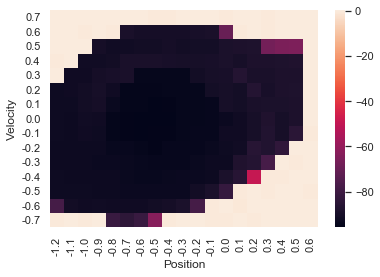

In [12]:
# Heatmap
yticks = np.linspace(-0.7,0.7, 15)
xticks = np.linspace(-1.2,0.6, 19)
ax = sns.heatmap(state_values.T, xticklabels=np.around(xticks,1), yticklabels=np.around(yticks,1))
ax.set_xlabel("Position")
ax.set_ylabel("Velocity")
ax.invert_yaxis()